# Split image to text lines before OCR

In [13]:
import os.path
# Importing the OpenCV library
import cv2 as cv

%load_ext autoreload
%autoreload 1
%aimport img_proc
%aimport img_ocr
%aimport config
import img_proc as imp
import img_ocr
from config import image_path, image_filename, start_row_number


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Reading the image using imread() function
gray = imp.read_gray_image(os.path.join(image_path, image_filename))


Height = 3888, Width = 5184


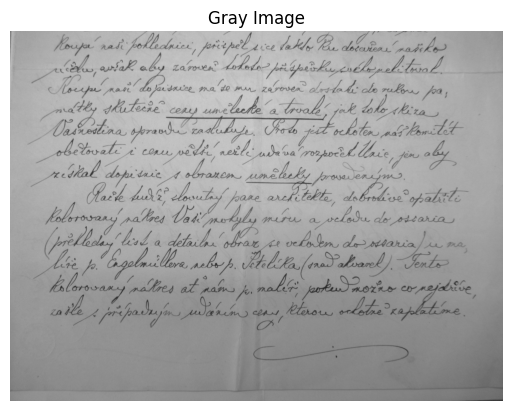

In [15]:
image = gray
# Extracting the height and width of an image
h, w = image.shape[:2]
# Displaying the height and width
print("Height = {}, Width = {}".format(h, w))# Display the gray image
imp.show_image(image, title='Gray Image', cmap='gray')

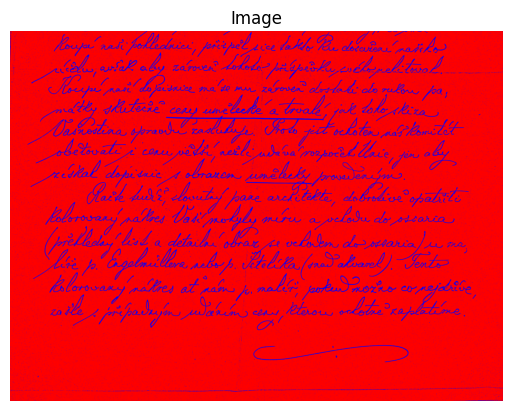

In [16]:
# Use adaptive thresholding to better separate text from light gray shadows
mask = imp.thresholding(image)
imp.show_image(mask, cmap="bwr")


bbox: [0, 0, 5184, 3888]
bbox: (0, 1, 5184, 3887)
bbox: (0, 1, 5184, 3886)
bbox: (0, 2, 5184, 3885)
bbox: (0, 3, 5184, 3884)
bbox: (0, 4, 5184, 3883)
bbox: (0, 5, 5184, 3882)
bbox: (0, 5, 5184, 3881)
bbox: (0, 6, 5184, 3880)
bbox: (1, 6, 5183, 3880)
bbox: (1, 6, 5183, 3879)
bbox: (1, 7, 5183, 3878)
bbox: (1, 8, 5183, 3877)
bbox: (1, 9, 5183, 3876)
bbox: (1, 9, 5183, 3875)


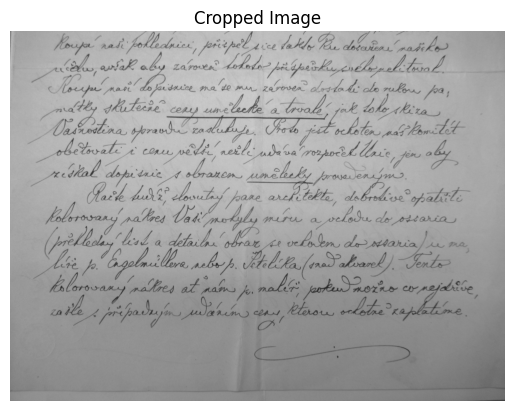

In [17]:
crop = imp.crop_dark_borders(image)
imp.show_image(crop, title='Cropped Image', cmap='gray')

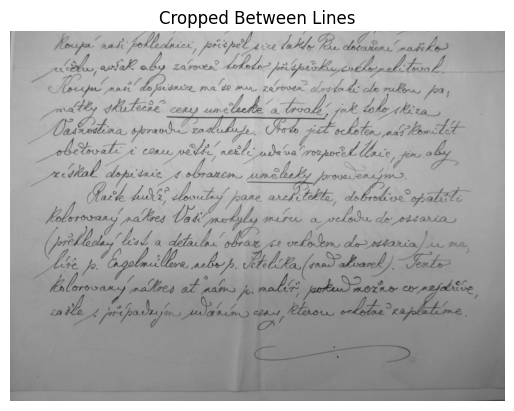

In [18]:

image = crop
cropped_between_lines = imp.crop_to_content(image)
imp.show_image(cropped_between_lines, title='Cropped Between Lines', cmap='gray')

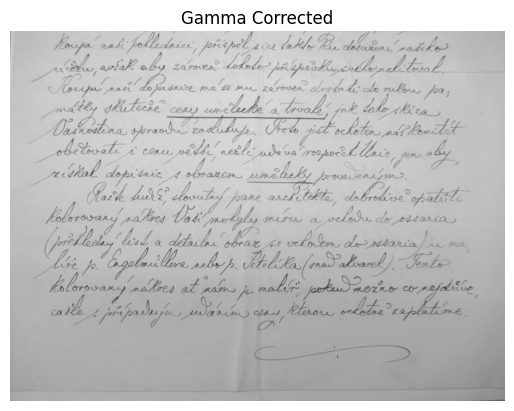

In [19]:
image = cropped_between_lines
# Improve image: increase lightness, keep dark characters, remove gray background
corrected = imp.gamma_correction(image)
imp.show_image(corrected, title='Gamma Corrected', cmap='gray')


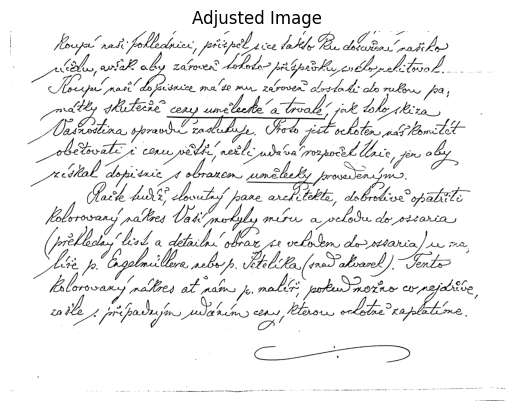

In [20]:

image = corrected
adaptive = imp.improve_image(image)
adjusted = imp.morphological_operations(adaptive)

imp.show_image(adjusted, title='Adjusted Image', cmap='gray')
imp.save_image(os.path.join(image_path, 'adjusted.png'), 
               adjusted)



In [21]:
image = adjusted
# save the result
extension = image_filename.split('.')[-1]
output_path = os.path.join(image_path, 
                           image_filename.replace(f'.{extension}',
                           f'_clean.{extension}'))
imp.save_image(output_path, image)

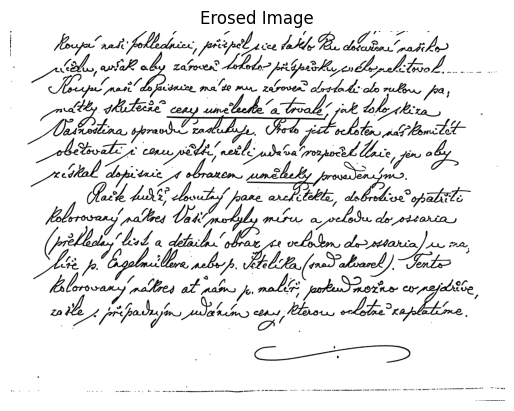

In [22]:
erosed = imp.erode(image, kernel_size=(2,2), iterations=3)
imp.show_image(erosed, 
               title='Erosed Image', 
               cmap='gray')
imp.save_image(output_path, erosed)

In [23]:
image = erosed
boxes, character_size, big_character_size = imp.find_contours(image)
print("Number of detected boxes", len(boxes))
print(f"Výška řádku (90. percentil): {big_character_size}")
print(f"Výška znaku (50. percentil): {character_size}")

Initial number of detected boxes 397
Character size (50. percentil): 65.0
 (90. percentil): 211.00000000000017
Number of detected boxes 397
Výška řádku (90. percentil): 211.00000000000017
Výška znaku (50. percentil): 65.0


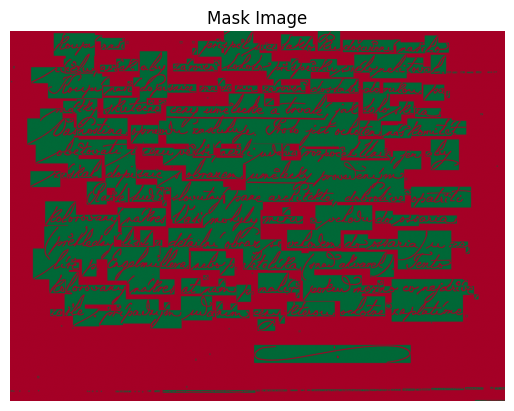

In [24]:
# make a mask image from the boxes
mask_image = imp.create_mask_image(image, boxes)
# show the mask image with source image on the background  
imp.show_image(imp.combine_with_mask(image, mask_image), 
               title='Mask Image', cmap='RdYlGn')

In [26]:
print(type(image))

<class 'numpy.ndarray'>


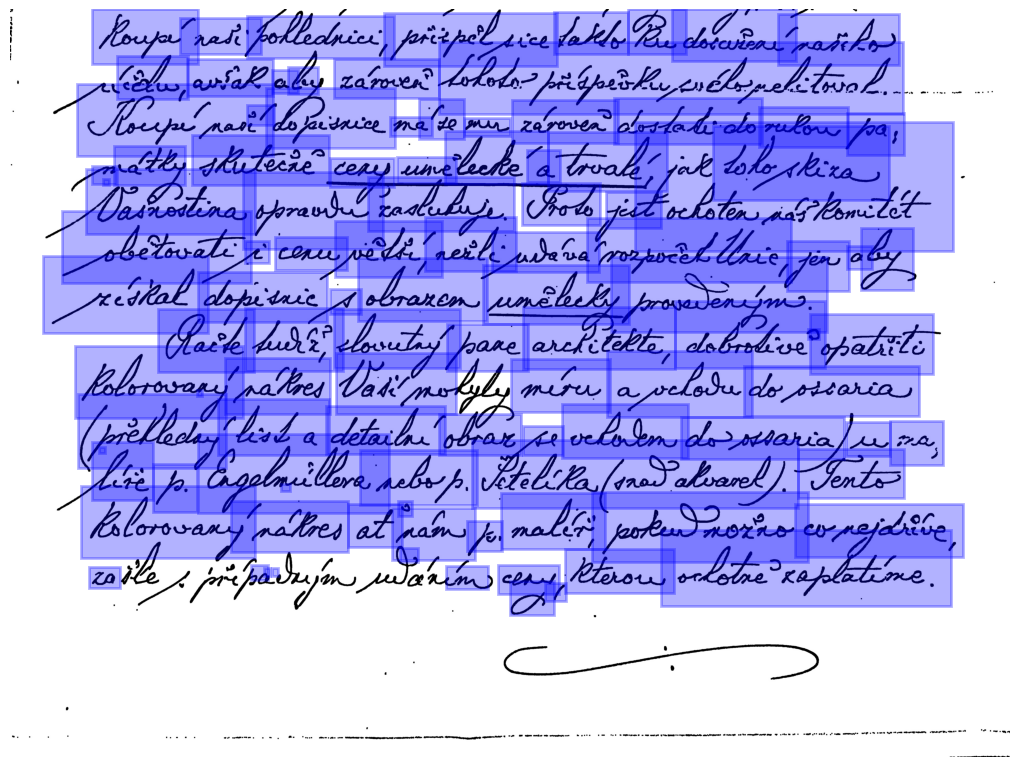

In [59]:
pages = img_ocr.split_image_into_lines(output_path)


In [66]:
lines = img_ocr.crop_lines_from_pages(image, pages, 0)
# Show number of detected lines
print(f"Počet detekovaných řádků: {len(lines)}")

Page dimensions: width=5183, height=3875
Image dimensions: shape=(3875, 5183)
Počet detekovaných řádků: 22


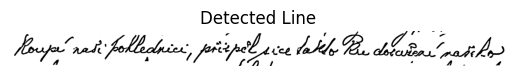

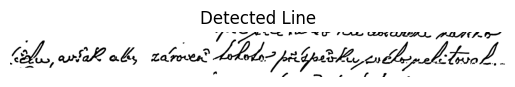

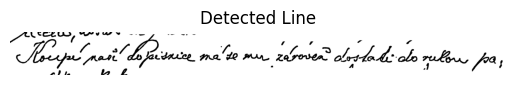

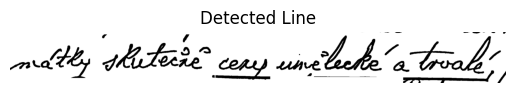

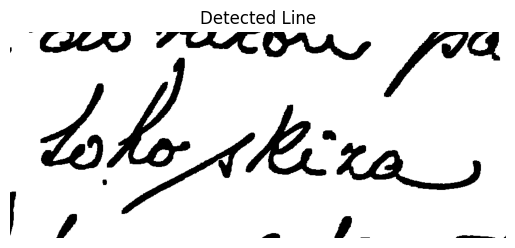

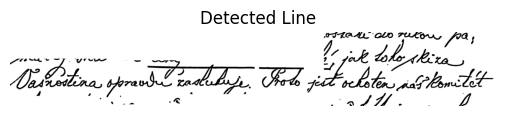

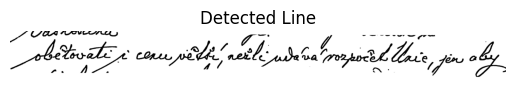

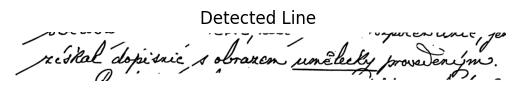

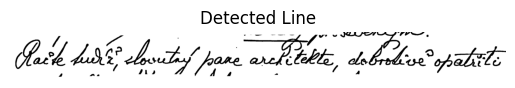

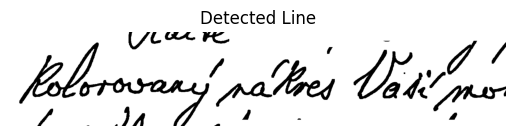

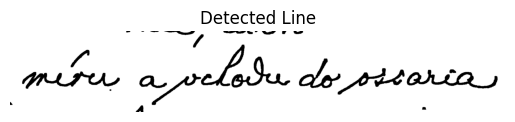

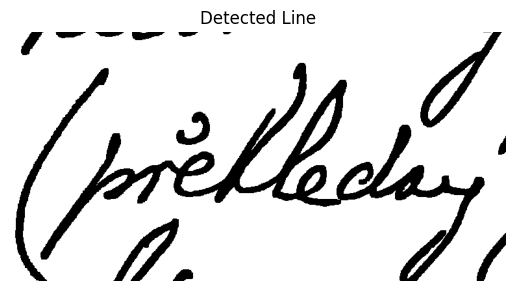

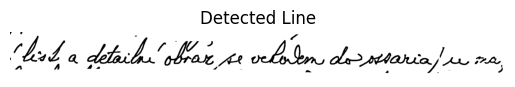

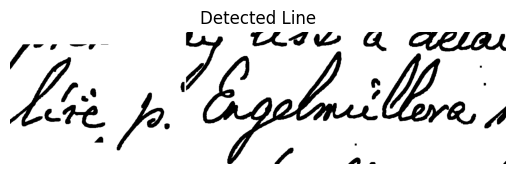

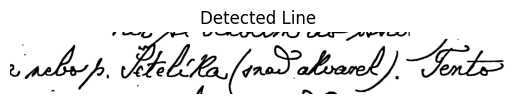

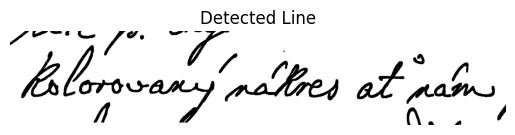

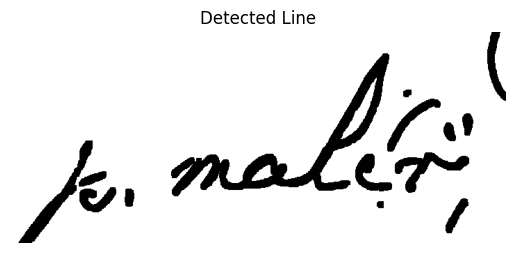

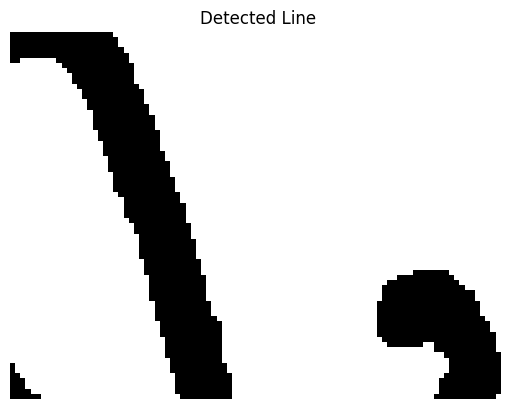

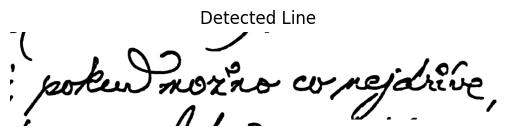

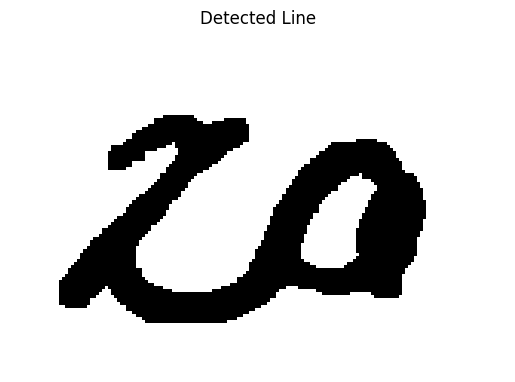

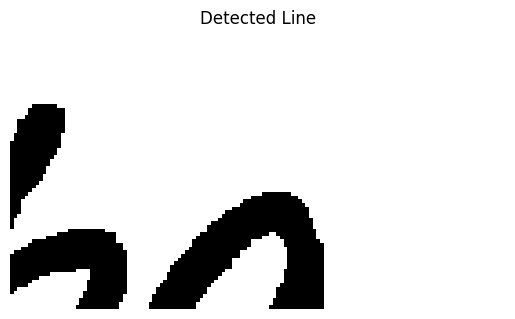

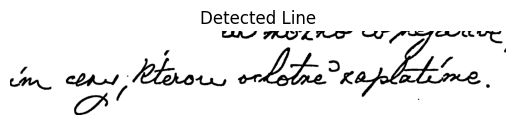

In [67]:
for line in lines:
    imp.show_image(line, title='Detected Line', cmap='gray')

In [ ]:
row_number = start_row_number
for line in lines:
    imp.save_image(f'{image_path}/lines/tmp/{image_filename}_line_{row_number}', line)
    row_number += 1